In [2]:
%pip install seaborn

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-3-6649fb56a7e1>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
bumble_data=pd.read_csv("bumble.csv")

In [5]:
values=pd.DataFrame(bumble_data)
values

,age,status,gender,body_type,diet,drinks,education,ethnicity,height,income,job,last_online,location,pets,religion,sign,speaks
0,22,single,m,a little extra,strictly anything,socially,working on college/university,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california",likes dogs and likes cats,agnosticism and very serious about it,gemini,english
1,35,single,m,average,mostly other,often,working on space camp,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california",likes dogs and likes cats,agnosticism but not too serious about it,cancer,"english (fluently), spanish (poorly), french (..."
2,38,available,m,thin,anything,socially,graduated from masters program,NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",has cats,NaN,pisces but it doesn&rsquo;t matter,"english, french, c++"
3,23,single,m,thin,vegetarian,socially,working on college/university,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",likes cats,NaN,pisces,"english, german (poorly)"
4,29,single,m,athletic,NaN,socially,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",likes dogs and likes cats,NaN,aquarius,english
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,single,f,NaN,NaN,socially,graduated from college/university,NaN,62.0,-1,sales / marketing / biz dev,2012-06-12-21-47,"oakland, california",has dogs,catholicism but not too serious about it,cancer and it&rsquo;s fun to think about,english
59942,24,single,m,fit,mostly anything,often,working on college/university,"white, other",72.0,-1,entertainment / media,2012-06-29-11-01,"san francisco, california",likes dogs and likes cats,agnosticism,leo but it doesn&rsquo;t matter,english (fluently)
59943,42,single,m,average,mostly anything,not at all,graduated from masters program,asian,71.0,100000,construction / craftsmanship,2012-06-27-23-37,"south san francisco, california",NaN,christianity but not too serious about it,sagittarius but it doesn&rsquo;t matter,english (fluently)
59944,27,single,m,athletic,mostly anything,socially,working on college/university,"asian, black",73.0,-1,medicine / health,2012-06-23-13-01,"san francisco, california",likes dogs and likes cats,agnosticism but not too serious about it,leo and it&rsquo;s fun to think about,"english (fluently), spanish (poorly), chinese ..."


In [6]:
missing_values=bumble_data.isnull().sum().sum()
missing_values

104438

In [7]:
missing_values_col=bumble_data.isnull().sum()
missing_values_col

age                0
status             0
gender             0
body_type       5296
diet           24395
drinks          2985
education       6628
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
pets           19921
religion       20226
sign           11056
speaks            50
dtype: int64

In [8]:
duplicate_values=bumble_data.duplicated().sum()
duplicate_values

0

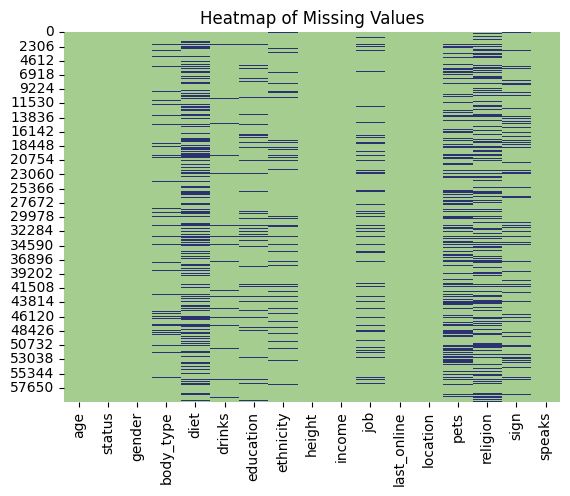

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(bumble_data.isnull(), cmap="crest", cbar=False)
plt.title("Heatmap of Missing Values")
plt.show()


In [10]:
bumble_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   gender       59946 non-null  object 
 3   body_type    54650 non-null  object 
 4   diet         35551 non-null  object 
 5   drinks       56961 non-null  object 
 6   education    53318 non-null  object 
 7   ethnicity    54266 non-null  object 
 8   height       59943 non-null  float64
 9   income       59946 non-null  int64  
 10  job          51748 non-null  object 
 11  last_online  59946 non-null  object 
 12  location     59946 non-null  object 
 13  pets         40025 non-null  object 
 14  religion     39720 non-null  object 
 15  sign         48890 non-null  object 
 16  speaks       59896 non-null  object 
dtypes: float64(1), int64(2), object(14)
memory usage: 4.6+ MB


In [11]:
bumble_data.shape

(59946, 17)

In [12]:
bumble_data.columns

Index(['age', 'status', 'gender', 'body_type', 'diet', 'drinks', 'education',
       'ethnicity', 'height', 'income', 'job', 'last_online', 'location',
       'pets', 'religion', 'sign', 'speaks'],
      dtype='object')

In [13]:
bumble_data["Age_range"] = pd.cut(bumble_data["age"], bins=[18,25,35,45,110])
bumble_data["Age_range"]

0         (18, 25]
1         (25, 35]
2         (35, 45]
3         (18, 25]
4         (25, 35]
           ...    
59941    (45, 110]
59942     (18, 25]
59943     (35, 45]
59944     (25, 35]
59945     (35, 45]
Name: Age_range, Length: 59946, dtype: category
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 45] < (45, 110]]

In [14]:
bumble_data["Age_range"].unique()

[(18.0, 25.0], (25.0, 35.0], (35.0, 45.0], (45.0, 110.0], NaN]
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 45] < (45, 110]]

Text(0, 0.5, 'Distribution')

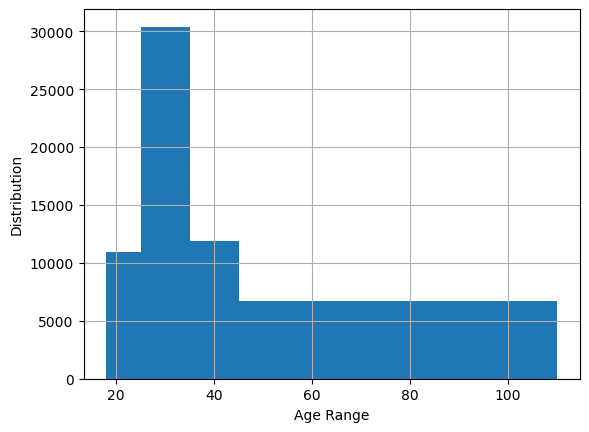

In [15]:
bumble_data["age"].hist(bins=[18,25,35,45,110])
plt.xlabel("Age Range")
plt.ylabel("Distribution")

In [16]:
bumble_data["height_cm"] = bumble_data["height"]*2.54

Text(0.5, 1.0, 'Gender Distribution')

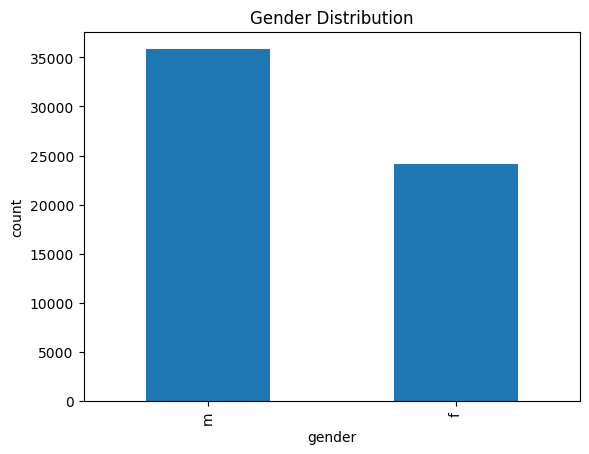

In [17]:
bumble_data["gender"].value_counts().plot.bar()
plt.ylabel("count")
plt.title("Gender Distribution")

Text(0, 0.5, 'count')

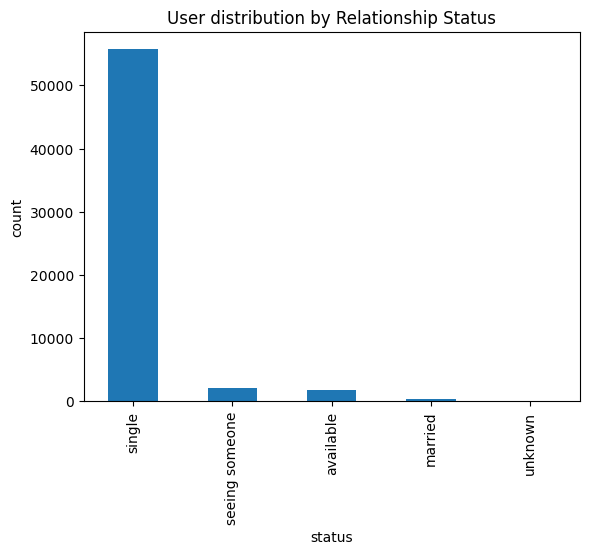

In [24]:
bumble_data["status"].value_counts().plot.bar()
plt.title("User distribution by Relationship Status")
plt.ylabel("count")

Text(0.5, 1.0, 'value per job')

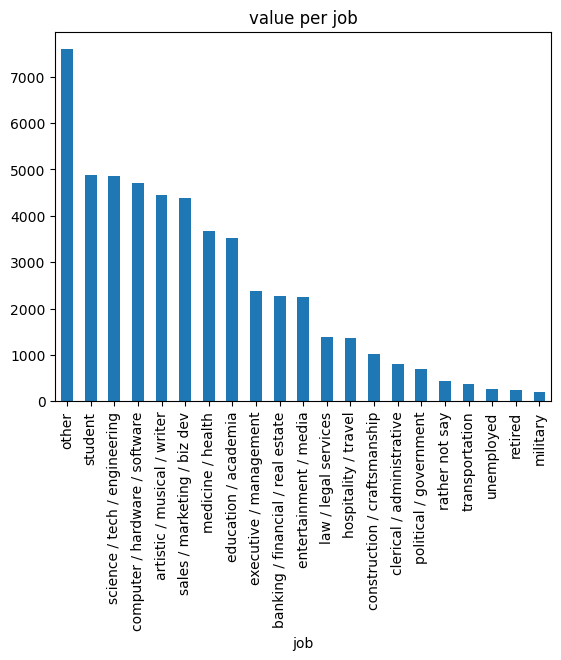

In [25]:
bumble_data["job"].value_counts().plot.bar()
plt.title("value per job")

In [26]:
status_gender_counts = pd.crosstab(bumble_data['status'], bumble_data['gender'])
status_gender_counts

gender,f,m
status,,
available,656,1209
married,135,175
seeing someone,1003,1061
single,22319,33378
unknown,4,6


<AxesSubplot:xlabel='status'>

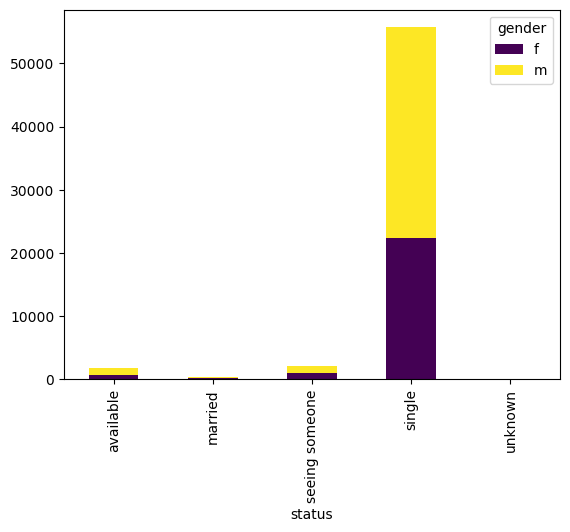

In [27]:
status_gender_counts.plot(kind='bar', stacked=True, colormap='viridis')

<AxesSubplot:xlabel='location'>

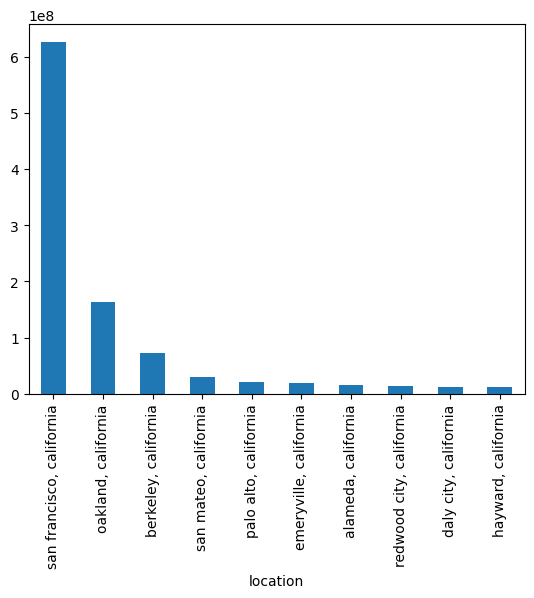

In [28]:
location_per_income=bumble_data.groupby('location')['income'].sum()
top10_income_locs=location_per_income.sort_values(ascending=False).head(10)
top10_income_locs.plot(x='location',y='income',kind='bar')

<AxesSubplot:xlabel='age', ylabel='income'>

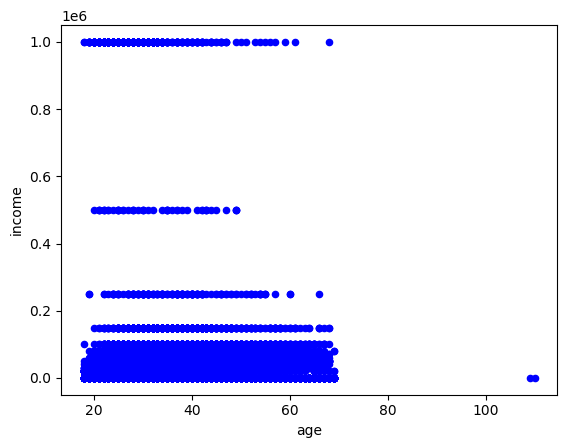

In [29]:
bumble_data.plot.scatter(x="age",y="income",color = "b")

In [30]:
age_income_counts = bumble_data.groupby(['Age_range']).mean("income")
age_income_counts

<ipython-input-30-f2d3720b0d94>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_income_counts = bumble_data.groupby(['Age_range']).mean("income")


,age,height,income,height_cm
Age_range,,,,
"(18, 25]",23.035560,68.224406,20631.935171,173.289992
"(25, 35]",29.807764,68.406883,19687.870969,173.753484
"(35, 45]",39.750069,68.325095,21072.974729,173.545741
"(45, 110]",53.514008,67.940827,18873.628708,172.569702


In [31]:
bumble_data_1 = bumble_data[["Age_range","income"]]
age_income_counts = bumble_data_1.groupby(['Age_range']).mean("income")
age_income_counts

<ipython-input-31-52e55f7a9997>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_income_counts = bumble_data_1.groupby(['Age_range']).mean("income")


,income
Age_range,
"(18, 25]",20631.935171
"(25, 35]",19687.870969
"(35, 45]",21072.974729
"(45, 110]",18873.628708


In [32]:
status_count=pd.crosstab(bumble_data['status'],bumble_data['gender'])
status_count

gender,f,m
status,,
available,656,1209
married,135,175
seeing someone,1003,1061
single,22319,33378
unknown,4,6


<AxesSubplot:xlabel='status'>

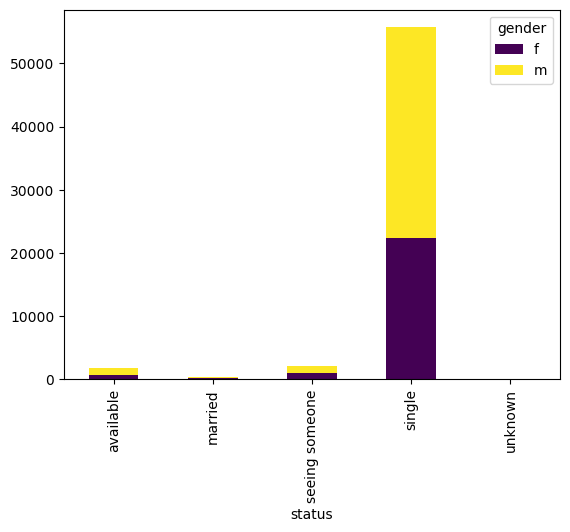

In [33]:
status_count.plot(kind='bar',stacked=True,colormap='viridis')

In [38]:
status_count=bumble_data.groupby(['status','gender']).size().unstack(fill_value=0)
status_count

gender,f,m
status,,
available,656,1209
married,135,175
seeing someone,1003,1061
single,22319,33378
unknown,4,6


<AxesSubplot:xlabel='status'>

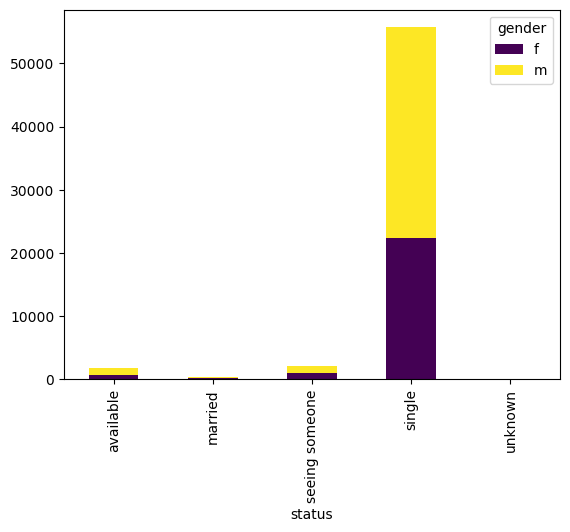

In [39]:
status_count.plot(kind='bar',stacked=True,colormap='viridis')

Correlation Analysis

Correlation analysis helps uncover relationships between variables, guiding feature engineering and hypothesis generation

<AxesSubplot:xlabel='age', ylabel='income'>

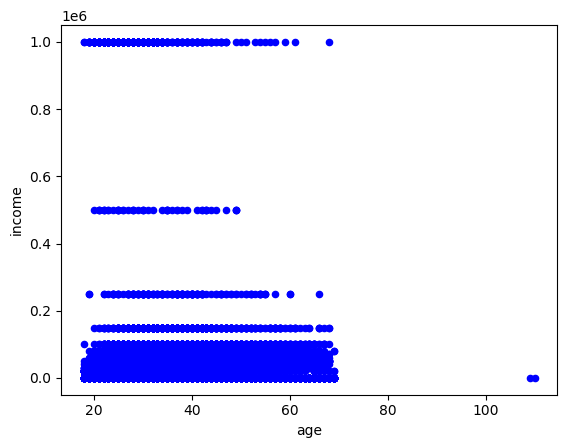

In [40]:
bumble_data.plot.scatter(x='age',y='income',color='b')

In [44]:
age_income_counts=bumble_data.groupby(['age','income']).mean(numeric_only=True).reset_index()
age_income_counts

,age,income,height,height_cm
0,18,-1,67.000000,170.180000
1,18,20000,67.836364,172.304364
2,18,30000,64.250000,163.195000
3,18,40000,72.000000,182.880000
4,18,50000,66.000000,167.640000
...,...,...,...,...
601,69,-1,67.962963,172.625926
602,69,20000,66.000000,167.640000
603,69,80000,69.500000,176.530000
604,109,-1,95.000000,241.300000


In [46]:
age_income_count=bumble_data.groupby(['Age_range']).mean('income')
age_income_count

<ipython-input-46-cf4d444862fb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_income_count=bumble_data.groupby(['Age_range']).mean('income')


,age,height,income,height_cm
Age_range,,,,
"(18, 25]",23.035560,68.224406,20631.935171,173.289992
"(25, 35]",29.807764,68.406883,19687.870969,173.753484
"(35, 45]",39.750069,68.325095,21072.974729,173.545741
"(45, 110]",53.514008,67.940827,18873.628708,172.569702


In [47]:
bumble_datas = bumble_data[["Age_range","income"]]
bumble_datas .head()

,Age_range,income
0,"(18, 25]",-1
1,"(25, 35]",80000
2,"(35, 45]",-1
3,"(18, 25]",20000
4,"(25, 35]",-1


In [48]:
age_income_count=bumble_data.groupby('Age_range')['income'].mean()
age_income_count

<ipython-input-48-007723f06682>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_income_count=bumble_data.groupby('Age_range')['income'].mean()


Age_range
(18, 25]     20631.935171
(25, 35]     19687.870969
(35, 45]     21072.974729
(45, 110]    18873.628708
Name: income, dtype: float64

In [49]:
bumble_data[['age', 'income']].corr()

,age,income
age,1.000000,-0.001004
income,-0.001004,1.000000


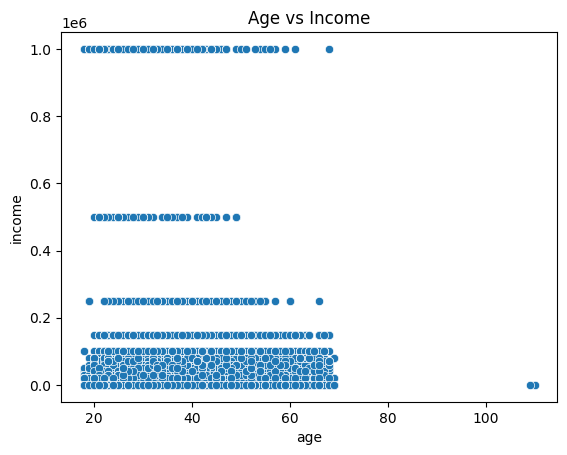

In [51]:
sns.scatterplot(x='age', y='income', data=bumble_data)
plt.title('Age vs Income')
plt.show()
    

In [52]:
age_income_counts['age_group']=age_income_counts.iloc[:,0]
age_income_counts

,age,income,height,height_cm,age_group
0,18,-1,67.000000,170.180000,18
1,18,20000,67.836364,172.304364,18
2,18,30000,64.250000,163.195000,18
3,18,40000,72.000000,182.880000,18
4,18,50000,66.000000,167.640000,18
...,...,...,...,...,...
601,69,-1,67.962963,172.625926,69
602,69,20000,66.000000,167.640000,69
603,69,80000,69.500000,176.530000,69
604,109,-1,95.000000,241.300000,109


Diet and Lifestyle Analysis

Lifestyle attributes such as diet, drinks provide insights into user habits and preferences. Analyzing these factors helps identify compatibility trends and inform product features like filters or match recommendations.

In [55]:
bumble_data['diet'].unique()

array(['strictly anything', 'mostly other', 'anything', 'vegetarian', nan,
       'mostly anything', 'mostly vegetarian', 'strictly vegan',
       'strictly vegetarian', 'mostly vegan', 'strictly other',
       'mostly halal', 'other', 'vegan', 'mostly kosher',
       'strictly halal', 'halal', 'strictly kosher', 'kosher'],
      dtype=object)

In [56]:
bumble_data['diet'].nunique()

18

In [59]:
diet_df=bumble_data.groupby(['diet']).size()
diet_df

diet
anything                6183
halal                     11
kosher                    11
mostly anything        16585
mostly halal              48
mostly kosher             86
mostly other            1007
mostly vegan             338
mostly vegetarian       3444
other                    331
strictly anything       5113
strictly halal            18
strictly kosher           18
strictly other           452
strictly vegan           228
strictly vegetarian      875
vegan                    136
vegetarian               667
dtype: int64

In [64]:
diet_distribution=bumble_data['diet'].value_counts(normalize=True)*100
diet_distribution

diet
mostly anything        46.651290
anything               17.391916
strictly anything      14.382155
mostly vegetarian       9.687491
mostly other            2.832550
strictly vegetarian     2.461253
vegetarian              1.876178
strictly other          1.271413
mostly vegan            0.950747
other                   0.931057
strictly vegan          0.641332
vegan                   0.382549
mostly kosher           0.241906
mostly halal            0.135017
strictly halal          0.050631
strictly kosher         0.050631
halal                   0.030941
kosher                  0.030941
Name: proportion, dtype: float64

<AxesSubplot:title={'center':'Diet Preference Distribution'}, xlabel='diet'>

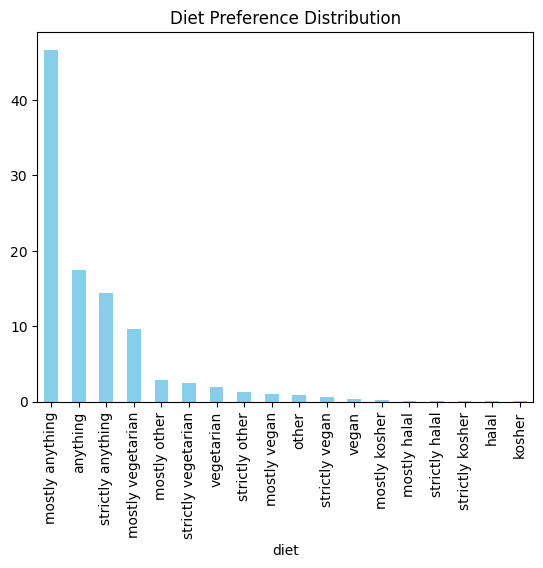

In [66]:
diet_distribution.plot(kind='bar', color='skyblue', title='Diet Preference Distribution')


In [68]:
bumble_data['drinks'].nunique()

6

In [73]:
drink_distribution=bumble_data['drinks'].value_counts(normalize=True)*100
drink_distribution

drinks
socially       73.348431
rarely         10.458033
often           9.065852
not at all      5.735503
very often      0.826882
desperately     0.565299
Name: proportion, dtype: float64

<AxesSubplot:xlabel='drinks'>

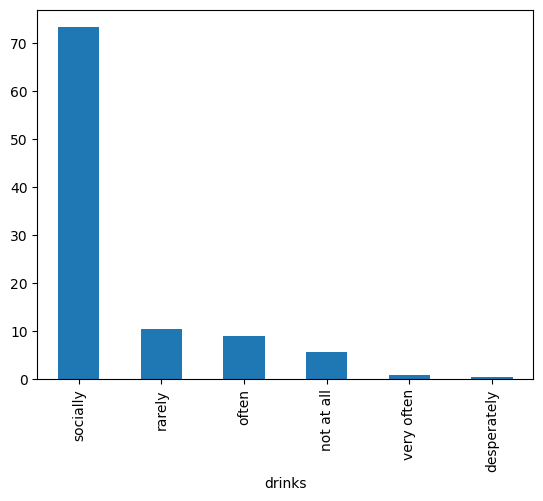

In [74]:
drink_distribution.plot(kind='bar')

In [77]:
drinks_vs_diet=pd.crosstab(bumble_data['diet'],bumble_data['drinks'],normalize='index')*100
drinks_vs_diet

drinks,desperately,not at all,often,rarely,socially,very often
diet,,,,,,
anything,0.350467,4.923231,9.579439,8.511348,75.667557,0.967957
halal,0.000000,44.444444,11.111111,0.000000,44.444444,0.000000
kosher,0.000000,9.090909,0.000000,18.181818,63.636364,9.090909
mostly anything,0.406479,5.185687,8.536060,9.466034,75.611258,0.794482
mostly halal,6.976744,23.255814,4.651163,18.604651,37.209302,9.302326
mostly kosher,1.190476,8.333333,4.761905,20.238095,59.523810,5.952381
mostly other,0.820513,9.333333,5.025641,18.051282,66.256410,0.512821
mostly vegan,0.621118,12.422360,6.832298,19.254658,59.937888,0.931677
mostly vegetarian,0.572117,5.871725,7.015959,14.031918,71.906052,0.602228


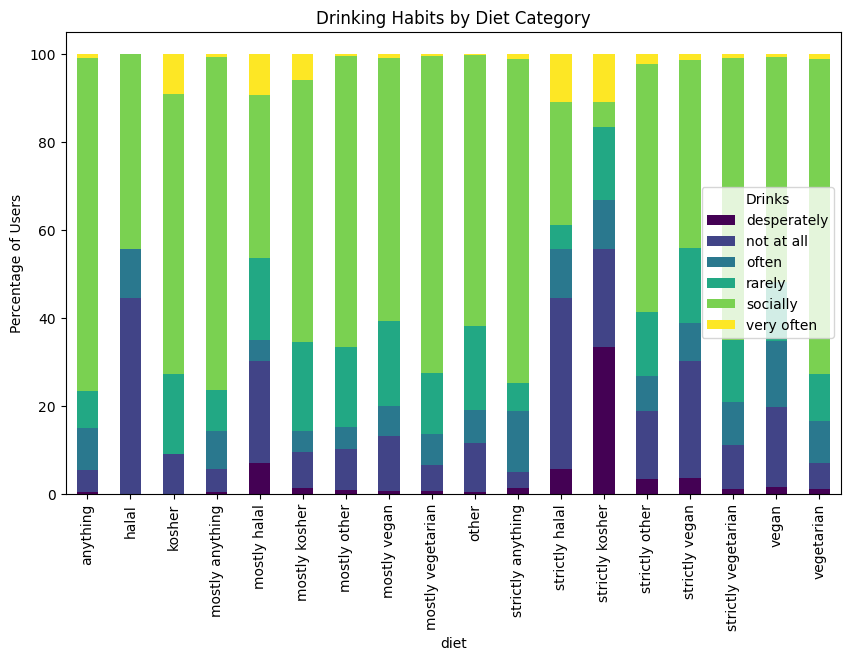

In [78]:
drinks_vs_diet.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10,6))
plt.ylabel('Percentage of Users')
plt.title('Drinking Habits by Diet Category')
plt.legend(title='Drinks')
plt.show()


 Geographical Insights

Geographical data helps Bumble understand its user base distribution, enabling targeted regional campaigns and feature localization.

In [79]:
bumble_data.columns

Index(['age', 'status', 'gender', 'body_type', 'diet', 'drinks', 'education',
       'ethnicity', 'height', 'income', 'job', 'last_online', 'location',
       'pets', 'religion', 'sign', 'speaks', 'Age_range', 'height_cm'],
      dtype='object')

In [81]:
bumble_data['location'].head(5)

0    south san francisco, california
1                oakland, california
2          san francisco, california
3               berkeley, california
4          san francisco, california
Name: location, dtype: object

In [90]:
bumble_data[['city','state']]=bumble_data['location'].str.split(',',n=1,expand=True)
bumble_data['city']=bumble_data['city'].str.strip()
top_cities = bumble_data['city'].value_counts().head(5)
top_states = bumble_data['state'].value_counts().head(5)
print("Top 5 Cities:\n", top_cities)
print("\nTop 5 States:\n", top_states)

Top 5 Cities:
 city
san francisco    31064
oakland           7214
berkeley          4212
san mateo         1331
palo alto         1064
Name: count, dtype: int64

Top 5 States:
 state
california       59855
new york            17
illinois             8
massachusetts        5
texas                4
Name: count, dtype: int64


In [96]:
age_city=pd.crosstab(bumble_data['age'],bumble_data['city'])
age_city

city,alameda,albany,amsterdam,arcadia,asheville,ashland,astoria,atherton,atlanta,austin,...,vallejo,vancouver,walnut creek,washington,waterford,west oakland,westlake,woodacre,woodbridge,woodside
age,,,,,,,,,,,,,,,,,,,,,
18,7,2,0,0,0,0,0,0,0,0,...,11,0,3,0,0,0,0,0,0,0
19,14,2,0,0,0,0,0,1,0,0,...,8,0,4,0,0,0,2,0,0,0
20,19,4,0,0,0,0,0,2,0,0,...,29,0,8,0,0,0,0,1,0,1
21,22,4,0,0,0,0,0,3,0,0,...,28,0,7,0,0,0,0,0,0,1
22,29,7,0,0,0,0,0,3,0,0,...,43,0,18,0,1,0,0,1,0,0
23,31,5,0,0,0,0,0,2,0,0,...,36,0,19,0,0,1,0,0,0,0
24,48,4,0,0,0,0,0,1,0,0,...,34,0,39,1,0,0,1,0,0,1
25,30,10,0,0,0,0,0,5,1,0,...,25,0,48,0,0,0,0,1,0,1
26,54,13,0,0,0,0,0,6,0,0,...,33,0,44,0,0,1,2,0,0,0


In [97]:
top_cities = bumble_data['city'].value_counts().head(5).index
top_city_data = bumble_data[bumble_data['city'].isin(top_cities)]
avg_age_by_city = top_city_data.groupby('city')['age'].mean().sort_values()
print(avg_age_by_city)


city
berkeley         31.391738
san francisco    31.614312
palo alto        31.980263
oakland          33.178819
san mateo        33.437265
Name: age, dtype: float64


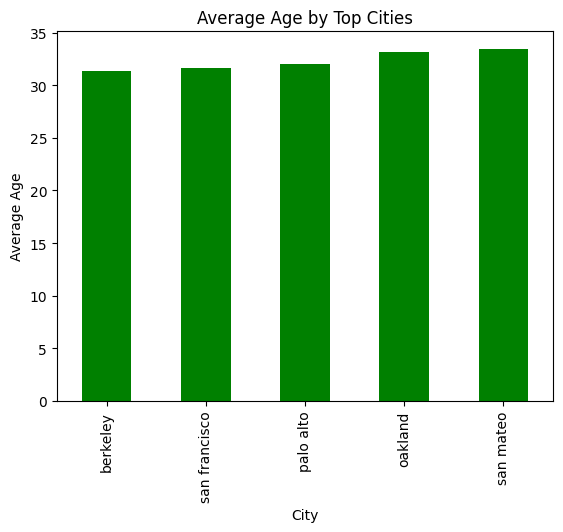

In [98]:
avg_age_by_city.plot(kind='bar', color='green', title='Average Age by Top Cities')
plt.ylabel('Average Age')
plt.xlabel('City')
plt.show()


In [101]:
avg_income=bumble_data.groupby('city')['income'].mean().reset_index()
top_city_income=avg_income.sort_values(by='income',ascending=True)
top_city_income.head(5)

,city,income
120,olema,-1.0
81,lake orion,-1.0
165,santa clara,-1.0
78,kula,-1.0
76,kensington,-1.0


In [106]:
top_states = bumble_data['state'].value_counts().head(5).index
top_state_data = bumble_data[bumble_data['state'].isin(top_states)]
avg_income_by_state = top_state_data.groupby('state')['income'].mean().sort_values(ascending=False)
avg_income_by_state


state
new york         31763.823529
california       20043.465609
massachusetts     5999.200000
texas             4999.250000
illinois            -1.000000
Name: income, dtype: float64

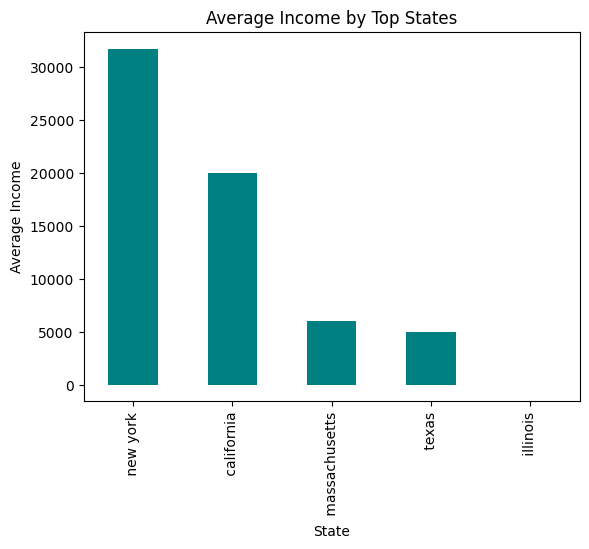

In [107]:
avg_income_by_state.plot(kind='bar', color='teal', title='Average Income by Top States')
plt.ylabel('Average Income')
plt.xlabel('State')
plt.show()


In [110]:
top_cities=bumble_data['city'].value_counts().head(5).index
top_city_data=bumble_data[bumble_data['city'].isin(top_cities)]
avg_income_by_city=top_city_data.groupby('city')['income'].mean().sort_values(ascending=True)
avg_income_by_city

city
berkeley         17363.848528
palo alto        19331.891917
san francisco    20149.176796
oakland          22585.852093
san mateo        22779.103681
Name: income, dtype: float64

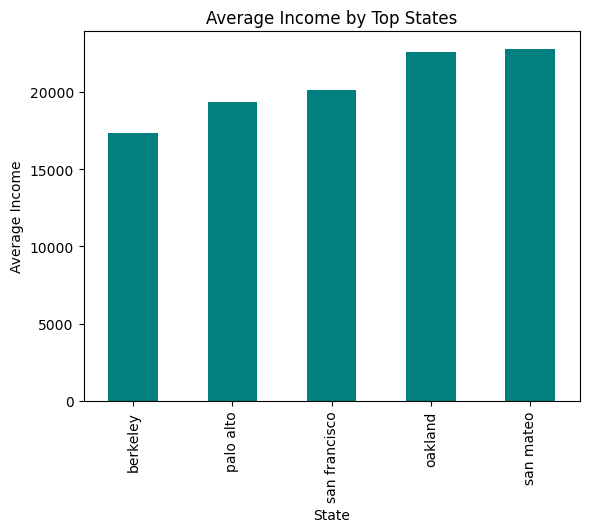

In [111]:
avg_income_by_city.plot(kind='bar', color='teal', title='Average Income by Top States')
plt.ylabel('Average Income')
plt.xlabel('State')
plt.show()

Height Analysis

Analyzing height patterns helps Bumble understand user demographics and preferences better.

In [114]:
avg_height=bumble_data.groupby('gender')['height'].mean().reset_index()
avg_height

,gender,height
0,f,65.103873
1,m,70.443492


In [115]:
avg_height_by_gender = bumble_data.groupby('gender')['height'].mean().sort_values(ascending=False)
print(avg_height_by_gender)


gender
m    70.443492
f    65.103873
Name: height, dtype: float64


In [118]:
avg_height_by_age=bumble_data.groupby('age')['height'].mean().reset_index()
avg_height_by_age

,age,height
0,18,67.119741
1,19,67.615385
2,20,67.982162
3,21,67.883775
4,22,68.090486
5,23,68.326389
6,24,68.384331
7,25,68.370538
8,26,68.545113
9,27,68.535957


In [122]:
avg_height_by_age=bumble_data.groupby('Age_range')['height'].mean().reset_index()
avg_height_by_age

<ipython-input-122-f063a4c757c2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_height_by_age=bumble_data.groupby('Age_range')['height'].mean().reset_index()


,Age_range,height
0,"(18, 25]",68.224406
1,"(25, 35]",68.406883
2,"(35, 45]",68.325095
3,"(45, 110]",67.940827


<ipython-input-126-8d0d36c1ac17>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_height_by_age, x='Age_range', y='height', palette='viridis')


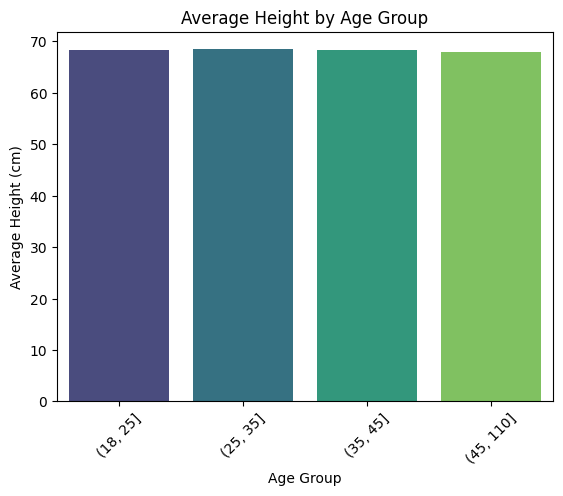

In [126]:
sns.barplot(data=avg_height_by_age, x='Age_range', y='height', palette='viridis')
plt.title('Average Height by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Height (cm)')
plt.xticks(rotation=45)
plt.show()


In [127]:
bumble_data.columns

Index(['age', 'status', 'gender', 'body_type', 'diet', 'drinks', 'education',
       'ethnicity', 'height', 'income', 'job', 'last_online', 'location',
       'pets', 'religion', 'sign', 'speaks', 'Age_range', 'height_cm', 'city',
       'state'],
      dtype='object')

<AxesSubplot:>

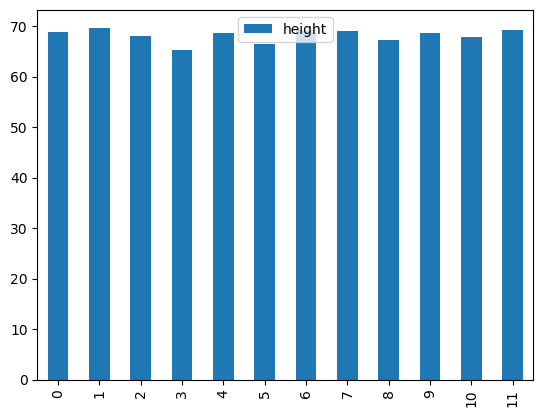

In [132]:
avg_height_by_body_type=bumble_data.groupby('body_type')['height'].mean().reset_index()
avg_height_by_body_type
avg_height_by_body_type.plot(kind='bar')

Income Analysis

Income is often an important factor for users on dating platforms. Understanding its distribution and relationship with other variables helps refine features like user search filters or personalized recommendations.

In [135]:
income_data = bumble_data[bumble_data['income'].notnull() & (bumble_data['income'] > 0)]

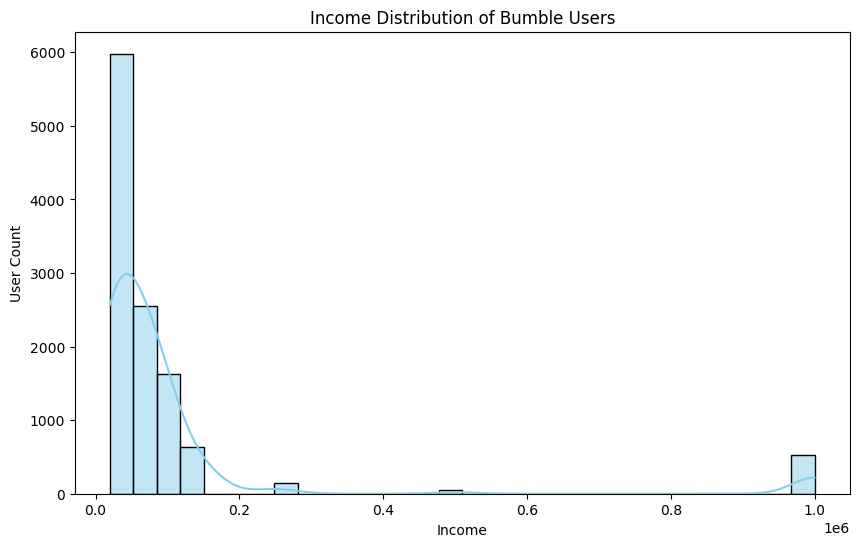

In [136]:
plt.figure(figsize=(10,6))
sns.histplot(income_data['income'], bins=30, kde=True, color='skyblue')
plt.title('Income Distribution of Bumble Users')
plt.xlabel('Income')
plt.ylabel('User Count')
plt.show()


In [137]:
income_bins = [0, 20000, 40000, 60000, 80000, 100000, 150000, 9999999]
income_labels = ['0–20k', '20k–40k', '40k–60k', '60k–80k', '80k–100k', '100k–150k', '150k+']
income_data['income_bracket'] = pd.cut(income_data['income'], bins=income_bins, labels=income_labels)

<ipython-input-137-bb8bac481165>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_data['income_bracket'] = pd.cut(income_data['income'], bins=income_bins, labels=income_labels)


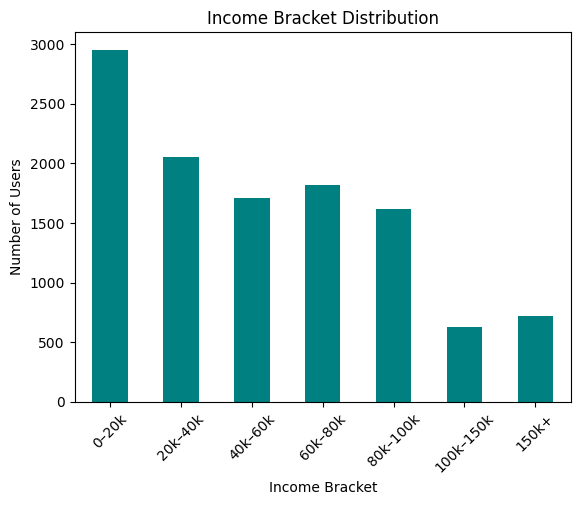

In [138]:
bracket_counts = income_data['income_bracket'].value_counts().sort_index()
bracket_counts.plot(kind='bar', color='teal')
plt.title('Income Bracket Distribution')
plt.xlabel('Income Bracket')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()


Data Visualization

Age Distribution

Understanding the distribution of user ages can reveal whether the platform caters to specific demographics or age groups. This insight is essential for targeted marketing and user experience design.

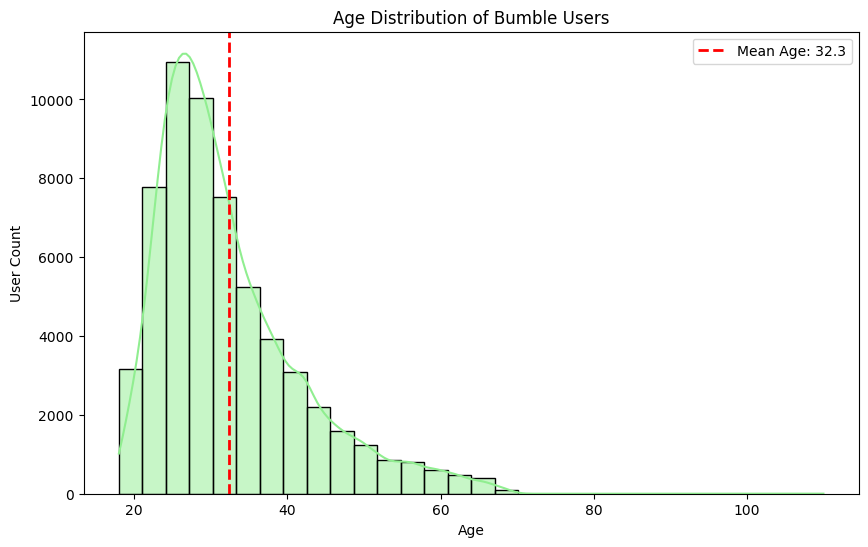

In [142]:
age_data=bumble_data['age'].dropna()
mean_age=age_data.mean()
plt.figure(figsize=(10, 6))
sns.histplot(age_data, bins=30, kde=True, color='lightgreen')
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean Age: {mean_age:.1f}')
plt.title('Age Distribution of Bumble Users')
plt.xlabel('Age')
plt.ylabel('User Count')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


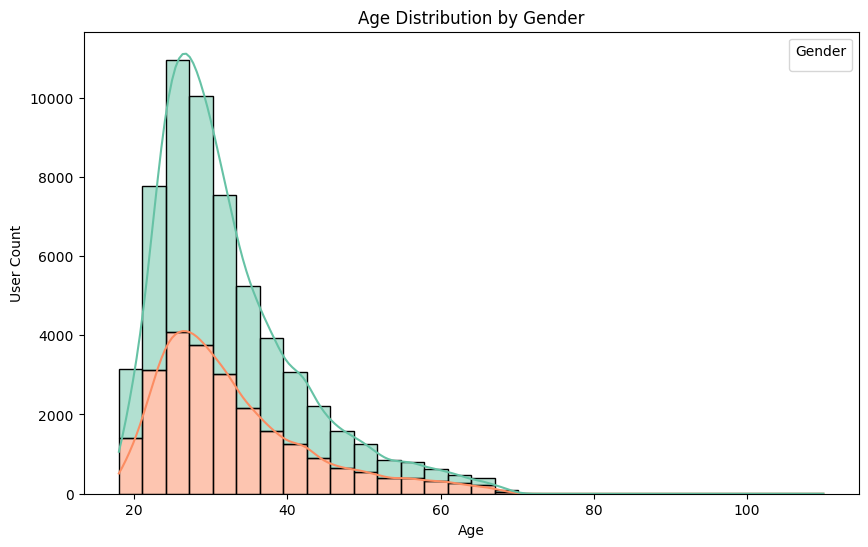

In [145]:
age_gender_data = bumble_data[['age', 'gender']].dropna()
plt.figure(figsize=(10, 6))
sns.histplot(data=age_gender_data, x='age', hue='gender', bins=30, kde=True, multiple='stack', palette='Set2')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('User Count')
plt.legend(title='Gender')
plt.show()

Income and Age

Visualizing the relationship between income and age helps uncover patterns in reported income levels across age groups, which could inform user segmentation strategies.

<AxesSubplot:xlabel='age', ylabel='income'>

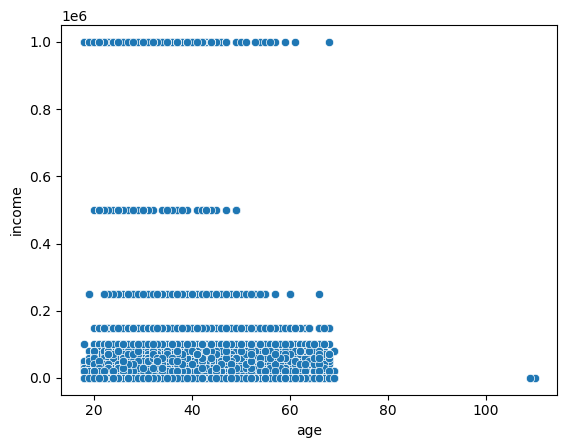

In [149]:
sns.scatterplot(data=bumble_data,x='age',y='income')

<ipython-input-151-cd135a09355e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=income_data, x='Age_range', y='income', palette='Set3')


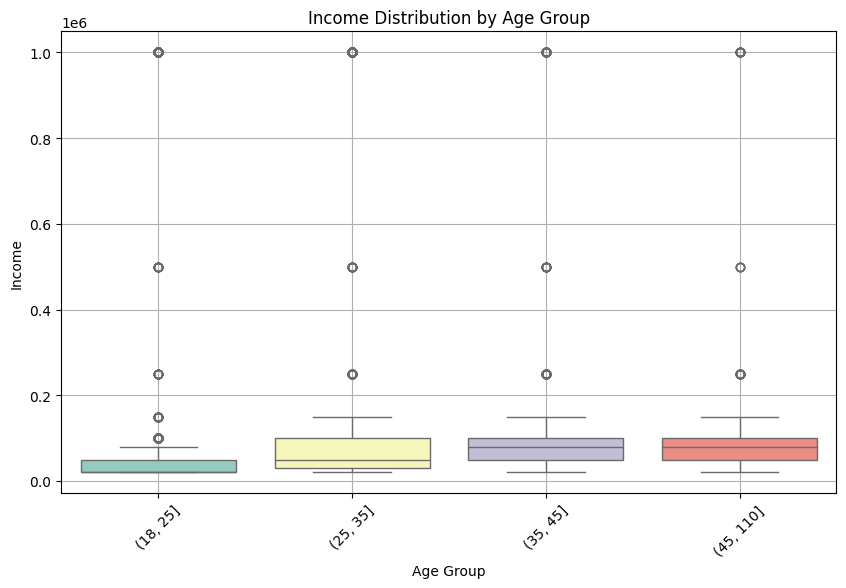

In [151]:
income_data = bumble_data[bumble_data['income'].notnull() & (bumble_data['income'] > 0)]
plt.figure(figsize=(10, 6))
sns.boxplot(data=income_data, x='Age_range', y='income', palette='Set3')
plt.title('Income Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


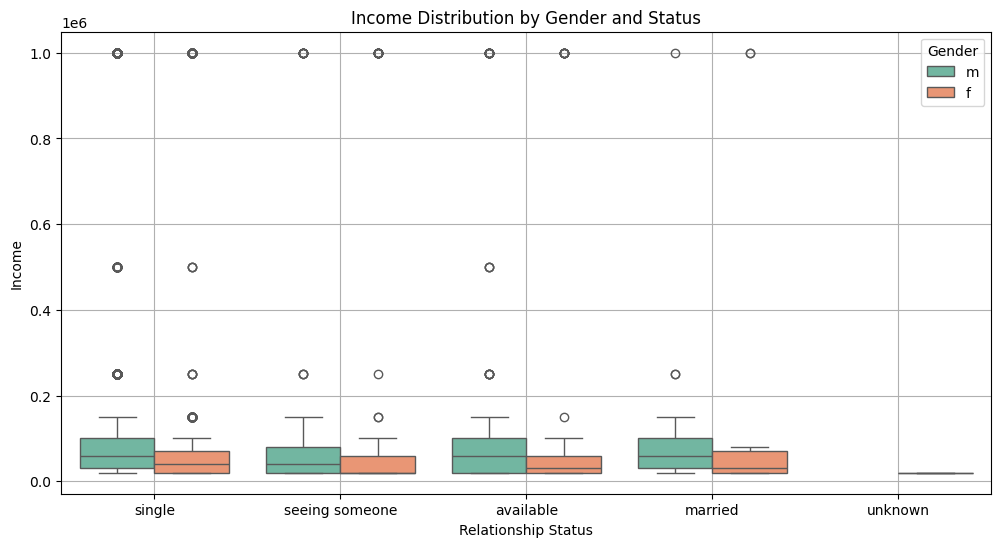

In [152]:
income_status_gender = bumble_data[
    (bumble_data['income'].notnull()) & 
    (bumble_data['income'] > 0) & 
    (bumble_data['gender'].notnull()) & 
    (bumble_data['status'].notnull())]
plt.figure(figsize=(12, 6))
sns.boxplot(data=income_status_gender, x='status', y='income', hue='gender', palette='Set2')
plt.title('Income Distribution by Gender and Status')
plt.xlabel('Relationship Status')
plt.ylabel('Income')
plt.legend(title='Gender')
plt.grid(True)
plt.show()


Pets and Preferences

Pets are often a key lifestyle preference and compatibility factor. Analyzing how pets preferences distribute across demographics can provide insights for filters or recommendations

<ipython-input-153-0fc388902a20>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pet_counts.values, y=pet_counts.index, palette='pastel')


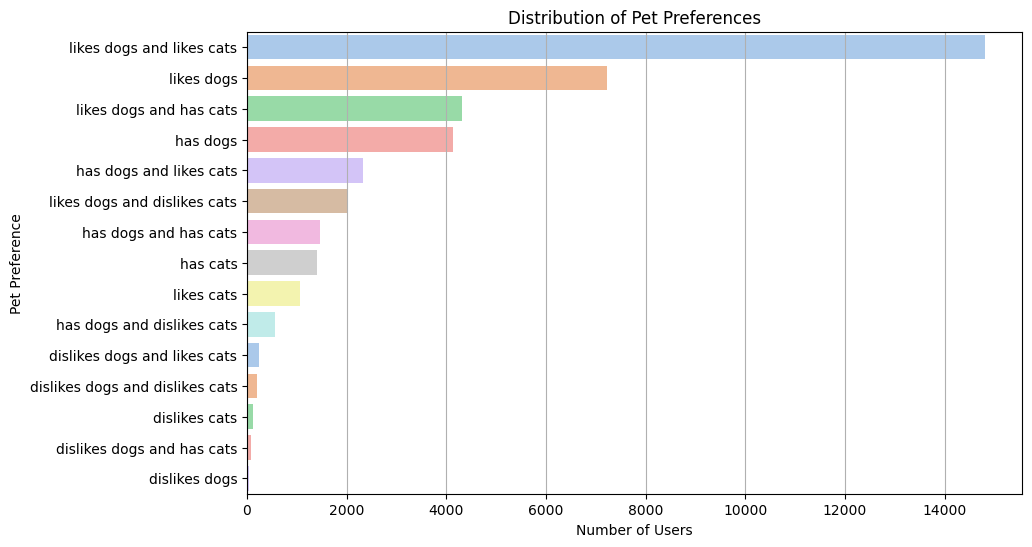

In [153]:
pet_counts = bumble_data['pets'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=pet_counts.values, y=pet_counts.index, palette='pastel')
plt.title('Distribution of Pet Preferences')
plt.xlabel('Number of Users')
plt.ylabel('Pet Preference')
plt.grid(True, axis='x')
plt.show()


<ipython-input-156-a5afb0706bd9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = pet_gender_age.groupby(['Age_range', 'gender', 'pets']).size().reset_index(name='count')


<Figure size 1400x600 with 0 Axes>

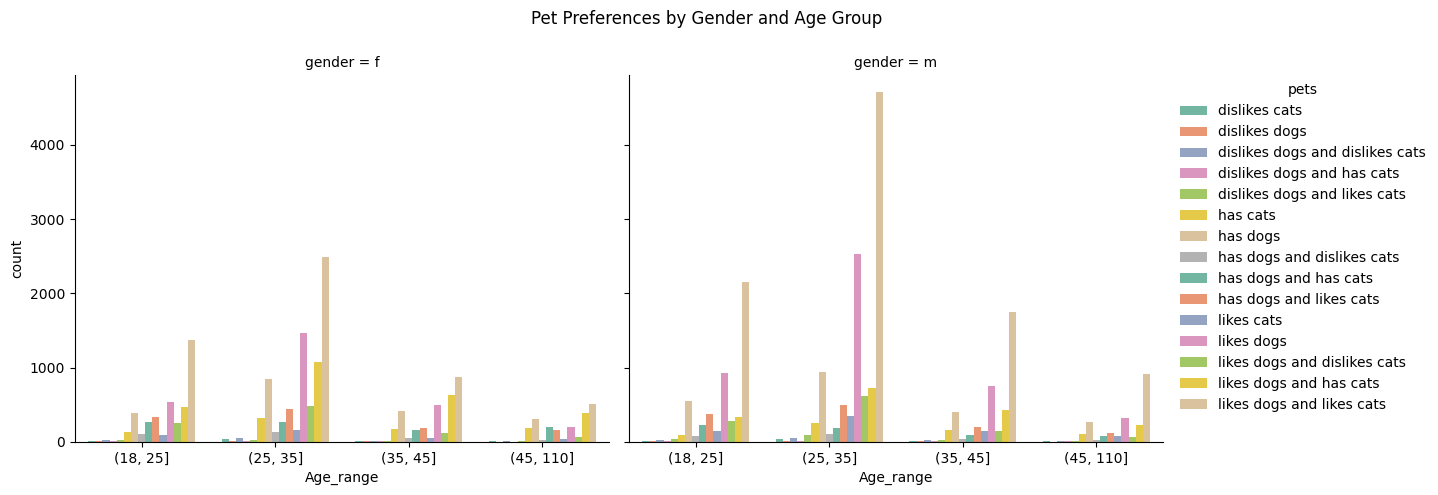

In [156]:

pet_gender_age = bumble_data[['pets', 'gender', 'Age_range']].dropna()
grouped = pet_gender_age.groupby(['Age_range', 'gender', 'pets']).size().reset_index(name='count')
plt.figure(figsize=(14, 6))
sns.catplot(
    data=grouped,
    x='Age_range',
    y='count',
    hue='pets',
    col='gender',
    kind='bar',
    height=5,
    aspect=1.2,
    palette='Set2'
)
plt.subplots_adjust(top=0.85)
plt.suptitle('Pet Preferences by Gender and Age Group')
plt.show()


Signs and Personality

Users’ self-reported zodiac signs (sign) can offer insights into personality preferences or trends. While not scientifically grounded, analyzing this data helps explore fun and engaging patterns.

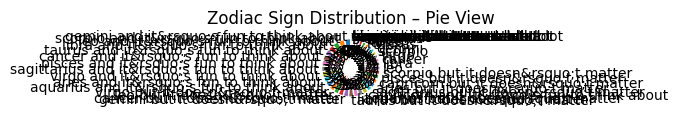

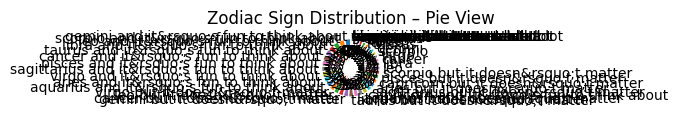

In [159]:
sign_counts = bumble_data['sign'].value_counts().dropna()
plt.figure(figsize=(6, 6))
sign_counts.plot(
    kind='pie',
    autopct='%1.0f%%',
    startangle=90,
    wedgeprops=dict(edgecolor='w'),
    label=''
)
plt.title('Zodiac Sign Distribution – Pie View')
plt.tight_layout()
plt.show()

Why a pie isn’t ideal here because there are twelve zodiac slices,anything over 5 slices quickly becomes cluttered.It’s hard to judge which slice is just a bit bigger.Legends or labels begin to overlap.

<ipython-input-160-f177a25e798c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


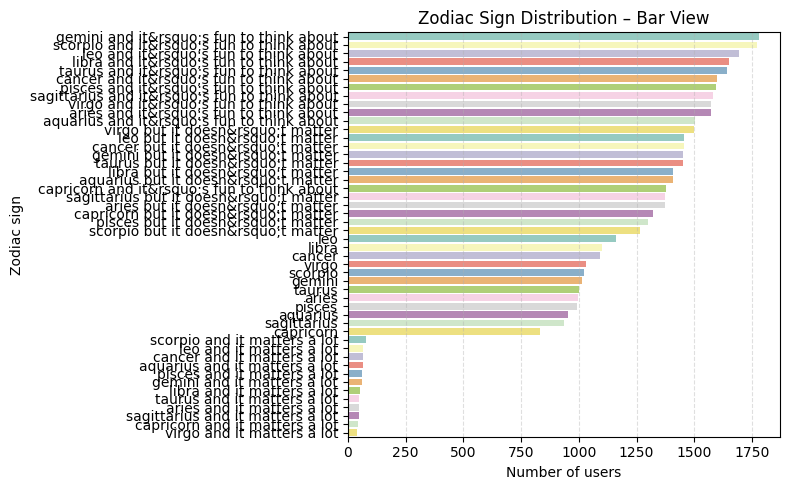

In [160]:
plt.figure(figsize=(8, 5))
sns.barplot(
    y=sign_counts.index,
    x=sign_counts.values,
    palette='Set3'
)
plt.title('Zodiac Sign Distribution – Bar View')
plt.xlabel('Number of users')
plt.ylabel('Zodiac sign')
plt.grid(axis='x', ls='--', alpha=0.4)
plt.tight_layout()
plt.show()
